In [18]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import scipy.integrate as si
import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

Populating the interactive namespace from numpy and matplotlib


In [19]:
fs_pt = 433.62
fs_in = fs_pt/72.0

rcParams['text.usetex'] = True
rcParams['figure.figsize'] = (fs_in, fs_in)

In [12]:
def ddL_dz(z):
    return Planck15.comoving_distance(z).to(u.Gpc).value + (1+z)*Planck15.hubble_distance.to(u.Gpc).value/Planck15.efunc(z)

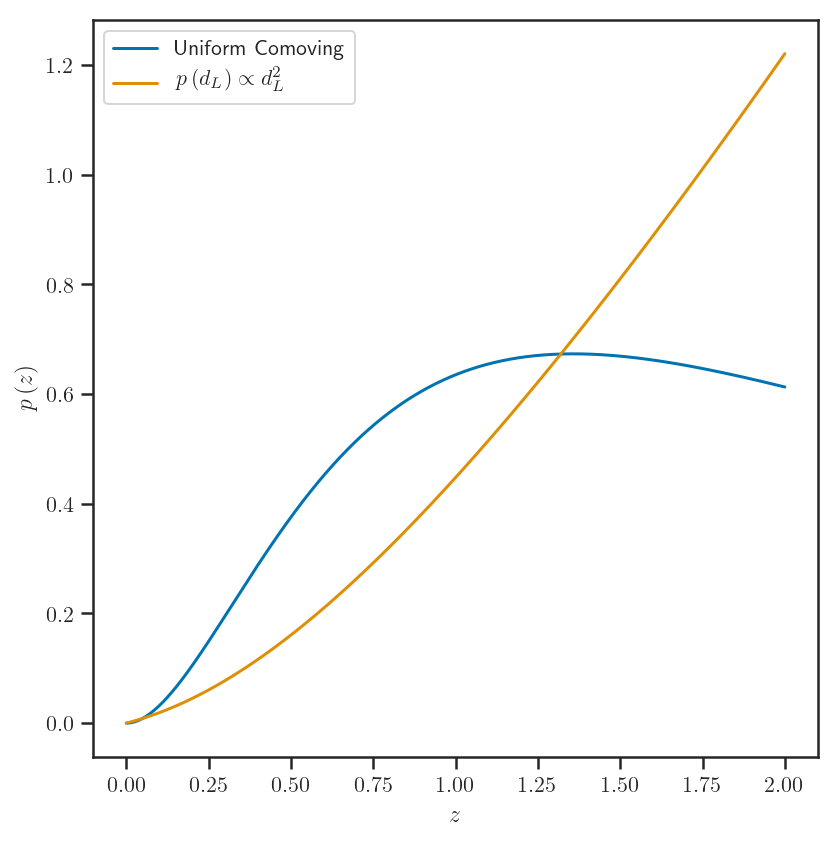

In [28]:
zs = linspace(0, 2, 1000)
dNdz = Planck15.differential_comoving_volume(zs).to(u.Gpc**3/u.sr).value/(1+zs)
dl2 = Planck15.luminosity_distance(zs).to(u.Gpc).value*ddL_dz(zs)

pvz = dNdz / trapz(dNdz, zs)
pdz = dl2 / trapz(dl2, zs)

plot(zs, pvz, label='Uniform Comoving')
plot(zs, pdz, label=r'$p\left( d_L \right) \propto d_L^2$')

xlabel(r'$z$')
ylabel(r'$p\left( z \right)$')

legend(loc='best')

tight_layout()

savefig('dl2-is-bad.pdf')

In [23]:
def appr(dL):
    c = array([1.012306, 1.136740, 0.262462, 0.016732, 0.000387])[::-1]
    return dL**2 / np.polyval(c, dL)

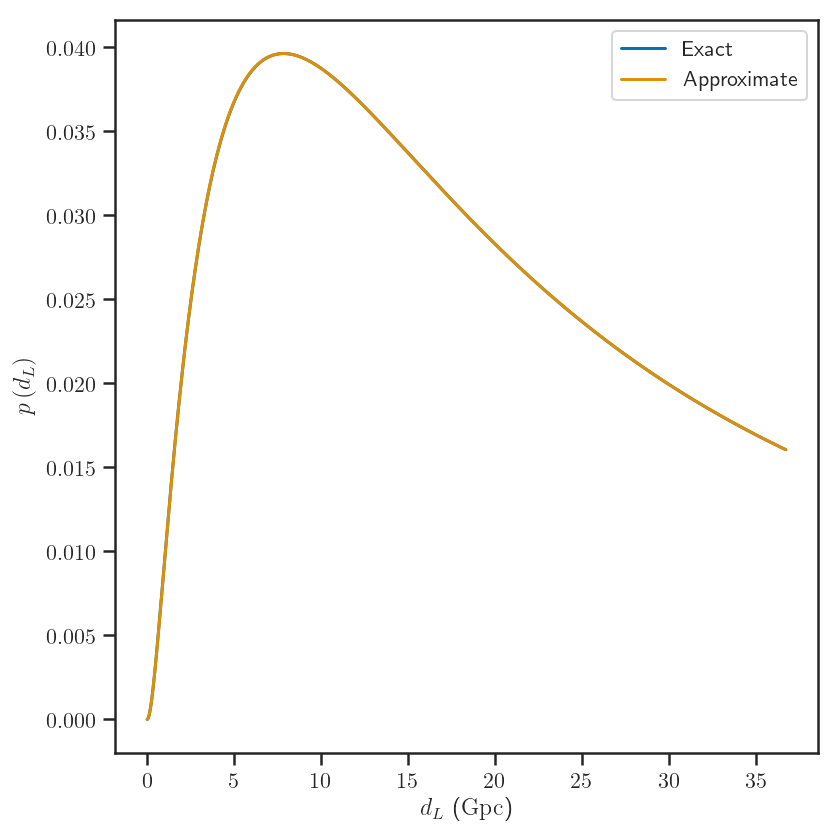

In [26]:
zs = linspace(0, 4, 1000)
dl = Planck15.luminosity_distance(zs).to(u.Gpc).value
dNdz = Planck15.differential_comoving_volume(zs).to(u.Gpc**3/u.sr).value/(1+zs)
dNddl = dNdz/ddL_dz(zs)

pexact = dNddl / trapz(dNddl, dl)
pap = appr(dl) / trapz(appr(dl), dl)

plot(dl, pexact, label='Exact')
plot(dl, pap, label='Approximate')

xlabel(r'$d_L$ ($\mathrm{Gpc}$)')
ylabel(r'$p\left( d_L \right)$')

legend(loc='best')

tight_layout()

savefig('prior-compare.pdf')

In [27]:
print(Planck15.__doc__)

Planck15 instance of FlatLambdaCDM cosmology

(from Planck Collaboration 2016, A&A, 594, A13 (Paper XIII), Table 4 (TT, TE, EE + lowP + lensing + ext))
